In [408]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [409]:
df = pd.read_csv('Analyst_Coding_Test_(1).csv')

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
shape    1000 non-null object
color    1000 non-null object
area     1000 non-null float64
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [411]:
df.head()

,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0
3,square,blue,3025.0
4,square,blue,9216.0


#### 1. Draw a boxplot showing the area size distribution for each shape.

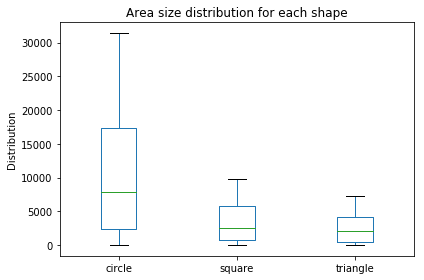

In [412]:
# Boxplot showing the area size distribution for each shape.
ax = df.boxplot(column=['area'], by=['shape'])
plt.suptitle('')
ax.set_xlabel('')
ax.set_ylabel('Distribution')
ax.grid(False)
ax.set_title('Area size distribution for each shape')
plt.tight_layout()

#### 2. Calculate the mean, max, and standard deviation of the area size of each color.

In [413]:
# Group by color, select the area column and aggregate by mean, max and std.
df.groupby('color')['area'].agg(['mean','max','std'])

,mean,max,std
color,,,
blue,3208.131667,21642.4,3039.212965
green,5761.119231,27759.1,6695.029606
red,3815.871034,31415.9,5092.678377
yellow,4538.208088,31415.9,5352.460578


#### 3. What is the average area size of a yellow square?

In [414]:
# Filter rows by 'yellow' color, group by shape, aggregate by mean, select data for square.
df[df['color']=='yellow'].groupby('shape')['area'].mean()[1]

3333.2072072072074

#### 4. Which shape is most likely to be green?

In [415]:
# Pivot data to create columns from the shapes, get the count for 'green' color.
g = df.pivot_table(columns='shape',values='area', index='color', aggfunc='count').loc['green']

# Sort the values (descending order), select the first value's index.
g.sort_values(ascending=False).index[0]

'square'

#### 6. Write a function that calculates the side or radius of an object, depending on the shape and area of the object [for an Equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].



In [416]:
def calc(shape, area):
    ''' the function takes as inputs the shape and the area of an object and returns 
    either the side (for squares and triangles) or the radius (for a circle)
    '''
    side = None
    radius = None
    if shape == 'square':
        side = math.sqrt(area)
        return side
    if shape == 'triangle':
        side = math.sqrt(area/(math.sqrt(3)/4))
        return side
    if shape == 'circle':
        radius = math.sqrt(area/math.pi)
    return radius

#### 7. Add a column to the dataset called "side" that shows the size matching the area in each row, round that number to the closest integer (shape side or radios).

In [417]:
# Create a new column 'side' and append to it the values created by using the calc function.
df['side'] = np.vectorize(calc)(df['shape'], df['area']).round(0)

#### 8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?

,mean,std,50%
shape,,,
circle,51.4,27.7,50.0
square,51.2,28.2,50.0
triangle,67.4,37.2,70.0


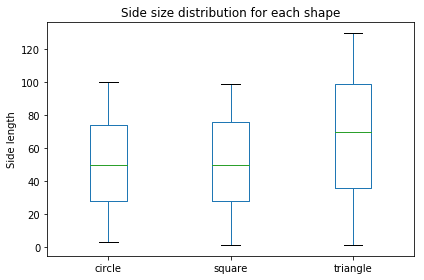

In [418]:
# Boxplot showing the side size distribution for each shape.
ax = df.boxplot(column=['side'], by=['shape'])
plt.suptitle('')
ax.set_xlabel('')
ax.set_ylabel('Side length')
ax.grid(False)
ax.set_title('Side size distribution for each shape')
plt.tight_layout()

pd.DataFrame(df.groupby('shape')['side'].describe()[['mean','std','50%']].round(1))

The plot above shows that the circle side (radius) and the square's side are very similar, both in terms of their sizes as well as the means, medians and the standard deviation. On the other hand the triangle's sides are on average around 30% longer.

#### 9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.

Text(0.5,1,'Side length of the object vs the area')

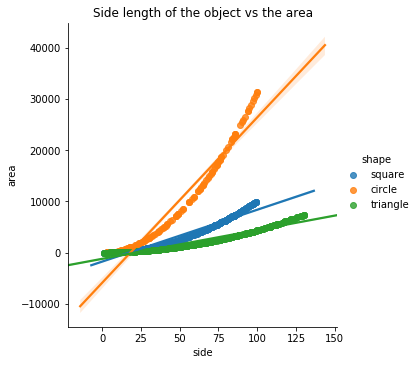

In [419]:
# Scatter plot of side vs area, differentiated by shape.
sns.lmplot(x='side', y='area', data=df, hue='shape')
plt.title('Side length of the object vs the area')

#### 10. Create a dataframe, table or list that show for each shape:

a. The proportion of red objects within the shape

b. The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).

In [420]:
# Grouping the data by shape and color and aggregating by count to see the number of colors
# in each shape.
df1 = pd.DataFrame(df.groupby(['shape','color'])['area'].count())
df1.columns = ['count']
df1

count
shape    color        
circle   blue        9
         green      31
         red        30
         yellow     50
square   blue      152
         green      47
         red        56
         yellow    222
triangle blue      199
         red       204

In [421]:
# Transforming the count values into ratio of total values, where total is defined as the 
# sum of counts within each shape (level 0 in multi index)
red_ratio = pd.DataFrame(df1.groupby(level=[0])['count'].apply(lambda c: c / c.sum()))
red_ratio.columns = ['ratio']
red_ratio

ratio
shape    color           
circle   blue    0.075000
         green   0.258333
         red     0.250000
         yellow  0.416667
square   blue    0.318658
         green   0.098532
         red     0.117400
         yellow  0.465409
triangle blue    0.493797
         red     0.506203

In [422]:
# Selecting the red values from the multi index.
r = red_ratio.loc[(slice(None),'red'),:]
r

,,ratio
shape,color,
circle,red,0.250000
square,red,0.117400
triangle,red,0.506203


In [423]:
# Grouping the data by shape and color and aggregating by count to see the number of colors
# in each shape.
df2 = pd.DataFrame(df.groupby(['shape','color'])['area'].sum())
df2

area
shape    color           
circle   blue     78665.4
         green   325189.3
         red     386142.6
         yellow  494420.6
square   blue    586415.0
         green   124178.0
         red     176625.0
         yellow  739972.0
triangle blue    489847.0
         red     543835.0

In [424]:
# Transforming the sum values into ratio of total values 
# within each shape (level 0 in multi index)
blue_ratio = pd.DataFrame(df2.groupby(level=[0])['area'].apply(lambda c: c / c.sum()))
blue_ratio

area
shape    color           
circle   blue    0.061246
         green   0.253180
         red     0.300636
         yellow  0.384937
square   blue    0.360385
         green   0.076314
         red     0.108546
         yellow  0.454755
triangle blue    0.473886
         red     0.526114

In [425]:
# Selecting the blue values from the multi index.
b = red_ratio.loc[(slice(None),'blue'),:]
b.columns = ['ratio']
b

,,ratio
shape,color,
circle,blue,0.075000
square,blue,0.318658
triangle,blue,0.493797


#### 11. Create a function that calculates 10. b. for a given shape and color.

In [400]:
def area_ratio(df, shape, color):
    pd.DataFrame(df.groupby([shape,color])['area'].sum())
#     s2 = pd.DataFrame(df2.groupby(level=[0])['area'].apply(lambda c: c / c.sum()))
#     s2.loc[(slice(None),'blue'),:]
#     return s2

In [407]:
df.groupby(['shape','color'])['area'].sum().loc[('circle',),:]

shape   color 
circle  blue       78665.4
        green     325189.3
        red       386142.6
        yellow    494420.6
Name: area, dtype: float64

In [402]:
area_ratio(df,'square','red')

KeyError: 'square'

In [ ]:
'''
b. The proportion of blue area out of the shape's 
total area (sum of square inch blue area of the shape over sum of all shape size). '''

#### 5. Given the fact the the object is red, with an area size larger than 3,000 - what are the chances the object is a square? a triangle? a circle?

In [ ]:
# Select the subsample of only 'red' rows.

In [101]:
red = df[df['color']=='red'][['shape','area']]

In [102]:
red.head()

,shape,area
7,triangle,4563.0
9,triangle,5043.0
17,triangle,1518.8
24,triangle,3996.8
29,triangle,90.8


In [180]:
# Get the mean and std from the red dataset.
red_total=red.describe().loc[['mean','std']].round(1)

# Get the means and standard deviations of different shapes (from red color).
red_df = red.groupby('shape')['area'].agg(['mean','std']).round(1)

# Append the first data to the second data.
red_df.loc['total'] =[red_total.loc['mean'][0],red_total.loc['std'][0]]

red_df

,mean,std
shape,,
circle,12871.4,10671.8
square,3154.0,3083.2
triangle,2665.9,2123.5
total,3815.9,5092.7


In [181]:
from scipy.stats import zscore

In [176]:
red_total.loc['mean'][0]

3815.9

Text(0.5,0,'')

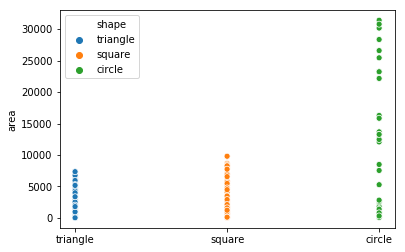

In [97]:
fig, ax = plt.subplots()
sns.scatterplot(data=df[df['color']=='red'],x='shape', y='area', hue='shape', ax=ax)
ax.set_xlabel('')

In [110]:
from sklearn.linear_model import LogisticRegression

/Users/anushavan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/anushavan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
